# Práctica: Los Juegos del Hambre

ESTUDIANTE: `NOELIA FERNÁNDEZ PÉREZ`

<table><tr>
    <td><img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/breakfast.jpg" style="width:300px;height:300px;"></td>
    <td><img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/hamburger.jpg" style="width:300px;height:300px;"></td>
    <td><img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/fruits.jpg" style="width:300px;height:300px;"></td>
</tr></table>

En esta práctica vamos a enfrentarnos a un problema desafiante de clasificación de imágenes, construyendo una red neuronal profunda que sea capaz de clasificar entre diferentes tipos de comida. ¡Que comiencen los Juegos del Hambre!

## Guidelines

A lo largo del notebook encontrarás celdas que debes rellenar con tu propio código. Sigue las instrucciones del notebook y presta atención a los siguientes iconos:

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Deberás resolver el ejercicio escribiendo tu propio código o respuesta en la celda inmediatamente inferior.</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
Esto es una pista u observación de utilidad que puede ayudarte a resolver el ejercicio. Presta atención a estas pistas para comprender el ejercicio en mayor profundidad.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
Este es un ejercicio avanzado que te puede ayudar a profundizar en el tema, y a conseguir una calificación más alta. ¡Buena suerte!</font>

***

Para evitar problemas con imports o incompatibilidades se recomienda ejecutar este notebook en uno de los [entornos de Deep Learning recomendados](https://github.com/albarji/teaching-environments-deeplearning), o hacer uso [Google Colaboratory](https://colab.research.google.com/). Si usas Colaboratory, asegúrate de [conectar una GPU](https://colab.research.google.com/notebooks/gpu.ipynb), y de haber [deactivado otras sesiones que tuvieras activas](https://stackoverflow.com/a/53441194/2436578).

El siguiente código mostrará todas las gráficas en el propio notebook en lugar de generar una nueva ventana.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Finalmente, si necesitas ayuda en el uso de cualquier función Python, coloca el cursor sobre su nombre y presiona Shift+Tab. Aparecerá una ventana con su documentación. Esto solo funciona dentro de celdas de código.

¡Vamos alla!

*  Vamos a fijar las semillas aleatorias de numpy y tensorflow para obtener resultados reproducibles entre varias ejecuciones del notebook

In [2]:
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

## Obtención de datos

Vamos a usar un dataset de imágenes de comida disponible en [Kaggle](https://www.kaggle.com/trolukovich/food11-image-dataset). Para descargarlo, necesitarás crear una cuenta de usuario en Kaggle, y obtener tus credenciales de la API. Puedes hacerlo siguiendo las instrucciones de [esta sección](https://github.com/Kaggle/kaggle-api#api-credentials). ¡Ojo! Tus credenciales de la API no son lo mismo que la contraseña que utilizas para acceder a tu cuenta en Kaggle.

Una vez tengas el fichero JSON con tus credenciales, puedes declararlas en este notebook asignando las variables de entorno adecuadas, de la siguiente manera

    import os

    os.environ["KAGGLE_USERNAME"] = "YOUR KAGGLE USERNAME HERE"
    os.environ["KAGGLE_KEY"] = "YOUR KAGGLE KEY HERE"
    
Cuando lo hayas hecho, podrás descargar el dataset a la máquina donde esté corriendo este notebook usando el siguiente comando

    !kaggle datasets download trolukovich/food11-image-dataset --unzip -p YOUR_LOCAL_FOLDER
    
donde debes indicar el nombre de un directorio válido como "YOUR_LOCAL_FOLDER". Si prefieres descargar los datos en la misma carpeta que este notebook, puedes quitar la parte `-p YOUR_LOCAL_FOLDER` del comando.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Crea tu propia cuenta de Kaggle (si no tienes ya una), obtén tus credenciales, y usa la celda inferior para declarar tu nombre de usuario de Kaggle y tu clave como variables de entorno. A continuación, usa la misma celda para descargar el dataset de imágenes.
    
¡Ojo! Debes mantener estas credenciales en secreto, ya que son personales a tu usuario de Kaggle. Recuerda borrarlas de la celda antes de entregar este notebook.
</font>

***

In [3]:
import os

os.environ["KAGGLE_USERNAME"] = "noeliafernndez"
os.environ["KAGGLE_KEY"] = "6d9499e7a6dcd3214dfc5c63e53dca0e"

!kaggle datasets download trolukovich/food11-image-dataset --unzip -p sample_data

 98% 1.06G/1.08G [00:05<00:00, 219MB/s]
100% 1.08G/1.08G [00:05<00:00, 216MB/s]


Revisa ahora la carpeta en la que has descargado los datos. Verás que contiene 3 subdirectorios:

* **training**, contiene las imágenes a utilizar para entrenar el modelo.
* **validation**, contiene imágenes adicionales que podrías usar como datos de entrenamiento adicionales, o para algún tipo de estrategia de validación como Early Stopping.
* **evaluation**, contiene las imágenes que debes utilizar para testear el modelo. Las imágenes de esta carpeta **solo** pueden utilizarse para medir el rendimiento del modelo tras su entrenamiento, y para nada más.

Además de esto, dentro de cada una de estas carpetas encontrarás una subcarpeta para cada una de las 11 clases de comida:

* Bread (panes)
* Dairy product (lácteos)
* Dessert (postres)
* Egg (huevos)
* Fried food (fritos)
* Meat (carnes)
* Noodles-Pasta (pasta)
* Rice (arroz)
* Seafood (pescado y marisco)
* Soup (sopas)
* Vegetable-Fruit (vegetales y frutas)

Esta es una forma estándar de organizar los datasets de imágenes: una carpeta para cada clase. Para facilitar los pasos de procesamiento que vendrán a continuación, vamos a definir algunas variables que nos indiquen dónde están almacenados los diferentes conjuntos de datos.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Crea variables <b>TRAINDIR</b>, <b>VALDIR</b> y <b>TESTDIR</b>, cada una conteniendo una cadena de texto con la ruta al directorio donde están los datos de entrenamiento, validación y evaluación, respectivamente.
</font>

***

In [4]:
TRAINDIR = "/content/sample_data/training"
VALDIR = "/content/sample_data/validation"
TESTDIR = "/content/sample_data/evaluation"

### Reducción de clases

Con el fin de hacer este problema más accesible de cara a la práctica, vamos a centrarnos solo en seis de las clases de comida disponibles: `Bread`, `Dairy product`, `Dessert`, `Egg`, `Fried food` y `Meat`. Para ello, se provee el código siguiente, que elimina de los datos descargados las carpetas correspondientes a imágenes de las otras clases.

In [5]:
from glob import glob
import os

valid_classes = {"Bread", "Dairy product", "Dessert", "Egg", "Fried food", "Meat"}
datasets = {TRAINDIR, VALDIR, TESTDIR}

for dataset in datasets:
    for classdir in glob(f"{dataset}/*"):  # Find subfolders with classes
        if classdir.split("/")[-1] not in valid_classes:  # Ignore those in valid_classes
            print(f"Deleting {classdir}...")
            for fname in glob(f"{classdir}/*.jpg"):  # Remove each image file
                os.remove(fname)
            os.rmdir(classdir)  # Remove folder

Deleting /content/sample_data/training/Seafood...
Deleting /content/sample_data/training/Soup...
Deleting /content/sample_data/training/Vegetable-Fruit...
Deleting /content/sample_data/training/Noodles-Pasta...
Deleting /content/sample_data/training/Rice...
Deleting /content/sample_data/evaluation/Seafood...
Deleting /content/sample_data/evaluation/Soup...
Deleting /content/sample_data/evaluation/Vegetable-Fruit...
Deleting /content/sample_data/evaluation/Noodles-Pasta...
Deleting /content/sample_data/evaluation/Rice...
Deleting /content/sample_data/validation/Seafood...
Deleting /content/sample_data/validation/Soup...
Deleting /content/sample_data/validation/Vegetable-Fruit...
Deleting /content/sample_data/validation/Noodles-Pasta...
Deleting /content/sample_data/validation/Rice...


## Procesando imágenes desde ficheros

Este dataset de imágenes es grande, con imágenes de mayor resolución que las que hemos utilizado en el tutorial del MNIST, y cada una de ellas teniendo diferentes tamaños y relación de aspecto. Además, mientras que para el MNIST teníamos una función de keras que preparaba los datos para nosotros, en esta ocasión tendremos que realizar el trabajo de carga y procesamiento de las imágenes.

Una forma conveniente de hacer todo este trabajo es a través de la función Keras `image_dataset_from_directory`. Esta función crea un objeto `Dataset` de TensorFlow con todas las imágenes de un directorio, cargándolas en memoria de forma dinámica solo cuando la red neuronal necesita utilizarlas. Esta función también nos permite especificar algunas opciones de preprocesamiento muy útiles.

Por ejemplo, podemos crear un `Dataset` con los datos en la carpeta de training:

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = 32
batch_size = 64

train_dataset = image_dataset_from_directory(
    TRAINDIR, 
    image_size = (image_size, image_size),
    batch_size = batch_size, 
    label_mode = 'categorical'
)

Found 6082 files belonging to 6 classes.


Observa los parámetros que se han utilizado para configurar el dataset:

* El **directorio** desde el que cargar las imágenes.
* Un **tamaño de imagen (image_size)** que se utilizará para redimensionar todas las imágenes cargadas a ese tamaño común, en este caso 32x32 píxeles.
* El **tamaños de los lotes (batch_size)** de imágenes a ser generados. Nótese que definimos aquí este parametro en lugar de en el paso `fit` de la red, como hemos hecho en otros ejercicios, porque el objeto `Dataset` resultante hará uso de esta información para mantener en memoria solo algunos batches de imágenes, ahorrando así memoria.
* El **modo de etiquetado (label_mode)**, esto es, la codificación de las etiquetas a utilizar. `categorical` significa que utilizaremos la ya conocida codificación one-hot.

Un objeto `Dataset` funciona de manera muy similar a un generador de Python, lo que significa que podemos iterar sobre él para obtener batches de imágenes ya preprocesadas. Por ejemplo, el siguiente código inicia un bucle para extraer todos los batches del `Dataset`, nos muestra el contenido el primero, y detiene la iteración.

In [7]:
for X_batch, y_batch in train_dataset:
    print(f"Shape of input batch: {X_batch.shape}")
    print(f"Shape of output batch: {y_batch.shape}")
    print(f"Input batch:\n{X_batch}")
    print(f"Output batch:\n{y_batch}")
    break

Shape of input batch: (64, 32, 32, 3)
Shape of output batch: (64, 6)
Input batch:
[[[[1.27289062e+02 1.22289062e+02 1.18789062e+02]
   [1.33929688e+02 1.31429688e+02 1.29929688e+02]
   [1.39929688e+02 1.34929688e+02 1.31429688e+02]
   ...
   [1.02929688e+02 7.00703125e+01 5.10000000e+01]
   [1.20710938e+02 9.27109375e+01 7.87109375e+01]
   [1.42359375e+02 1.19359375e+02 1.05359375e+02]]

  [[1.33132812e+02 1.29132812e+02 1.26132812e+02]
   [1.38289062e+02 1.33789062e+02 1.30789062e+02]
   [1.42789062e+02 1.37789062e+02 1.34789062e+02]
   ...
   [1.06398438e+02 7.10000000e+01 5.01328125e+01]
   [9.13671875e+01 6.04765625e+01 4.43906250e+01]
   [1.22867188e+02 9.91328125e+01 8.72656250e+01]]

  [[1.37648438e+02 1.32648438e+02 1.29648438e+02]
   [1.41648438e+02 1.37148438e+02 1.34148438e+02]
   [1.45703125e+02 1.37703125e+02 1.34703125e+02]
   ...
   [8.85546875e+01 6.45000000e+01 4.74453125e+01]
   [4.89062500e+01 3.12031250e+01 2.15000000e+01]
   [8.58906250e+01 6.13515625e+01 4.8203125

Podemos ver que, efectivamente, el generador produce un tensor de datos de entrada de las dimensiones apropiadas para poder introducirlo en la red neuronal, y que las salidas también se han codificado correctamente como one-hot.
No obstante, todavía hay un problema con los datos: los valores de los píxeles están en el rango [0, 255], lo cual puede producir problemas de entrenamiento. Resolveremos este punto después, en la definición de la red neuronal, mediante una capa especial. Por ahora vamos a cotinuar, definiendo una función que construya los `Dataset` para los datos de entrenamiento, validación y test.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Crea una función <b>create_datasets</b> que reciba los siguiente parámetros:
    <ul>
      <li><b>traindir</b>: el directorio donde están localizadas las imágenes de entrenamiento.</li>
      <li><b>valdir</b>: el directorio donde están localizadas las imágenes de validación.</li>
      <li><b>testdir</b>: el directorio donde están localizadas las imágenes de test.</li>
      <li><b>image_size</b>: el tamaño que se utilizará para redimensionar todas las imágenes a una resolución común.</li>
      <li><b>batch_size</b>: el tamaño de los batches de imágenes que serán generados.</li>
    </ul>
    La función debe crear objetos `Dataset` para los directorios de entrenamiento, validación y test, y devolver los tres datasets creados como

    return train_dataset, val_dataset, test_dataset
</font>

***

In [8]:
def create_datasets(traindir, valdir, testdir, image_size, batch_size):
  
  train_dataset = image_dataset_from_directory(
      traindir,
      image_size = (image_size, image_size),
      batch_size = batch_size,
      label_mode = 'categorical'
  )
  val_dataset = image_dataset_from_directory(
      valdir,
      image_size = (image_size, image_size),
      batch_size = batch_size,
      label_mode = 'categorical'
  )
  test_dataset = image_dataset_from_directory(
      testdir,
      image_size = (image_size, image_size),
      batch_size = batch_size,
      label_mode = 'categorical'
  )
  return train_dataset, val_dataset, test_dataset

Probemos que la función que has implementado funciona correctamente

In [9]:
import tensorflow as tf

train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size=32, batch_size=64)

# Test whether all returned objects are valid Tensorflow datasets
assert isinstance(train_dataset, tf.data.Dataset)
assert isinstance(val_dataset, tf.data.Dataset)
assert isinstance(test_dataset, tf.data.Dataset)

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


¡Ahora que tenemos nuestros `Dataset` podemos entrenar una red profunda con ellos! Como ejemplo, vamos a construir una red convolucional extremadamente simple. Nótese cómo hemos añadido una capa especial de preprocesado llamada `Rescaling`, que será la encargada de normalizar los valores de los píxeles al rango [0, 1] cada vez que la red reciba una imagen.

¡Ojo! Esta red tan simple no producirá errores al ejecutar, pero tiene algunos fallos de diseño que deberás corregir cuando crees tu propia red, más adelante en esta práctica.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Convolution2D, Rescaling

model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
model.add(Convolution2D(4, 3, activation='linear'))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])

El método `fit` de un modelo Keras puede recibir un objeto `Dataset` como datos de entrenamiento, en lugar de un par de tensores (entradas, salidas). Como al construir los `Dataset` ya especificamos el tamaño de batch, no es necesario indicarlo ahora.

In [11]:
model.fit(train_dataset, epochs=1)

96/96 [==============================] - 11s 83ms/step - loss: 1.7051 - accuracy: 0.2772


Análogamente, podemos evaluar el rendimiento de nuestro modelo sobre el `Dataset` de test de la siguiente manera

In [12]:
loss, acc = model.evaluate(test_dataset)
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

33/33 [==============================] - 4s 91ms/step - loss: 2.2450 - accuracy: 0.2618
Loss 2.25, accuracy 26.2%


Este nivel de acierto puede parecer pobre, pero ten en cuenta que hemos usado un modelo muy simple y que el problema es de 6 clases. ¿Serás capaz de hacerlo mejor?

## Construyendo tu propia red

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Diseña una red neuronal profunda que obtenga el mejor acierto posible sobre los datos de test. Puedes usar los datos de entrenamiento y validación como te parezca mejor, pero <b>sólo</b> puedes usar los datos de test para evaluar el acierto de tu modelo. Debes obtener una red capaz de alcanzar al menos un 40% de acierto sobre los datos de test.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
Algunas recomendaciones y estrategias que pueden ayudar a mejorar tu diseño de red:

    
- Usa todos los trucos que has aprendido en los ejercicios anteriores: capas convolucionales + pooling, activaciones ReLU, dropout... asegúrate también de utilizar un buen optimizador, con una función de error (loss) adecuada, así como una función de activación en la capa de salida que sea adecuada para esta clase de problema (clasificación multiclase).
- Empieza por redes pequeñas, con un número pequeño de parámetros, de forma que puedas comprobar rápidamente qué tal funcionan. Después, puedes hacer tu red más grande en tres direcciones: mayor tamaño de imágenes de entrada, más capas, y más kernels por capa convolucional o unidades por capa densa. Si aumentas el tamaño de las imágenes de entrada, asegúrate de añadir también más capas Convolution+Pooling, para que así a la capa Flatten solo lleguen imágenes muy pequeñas (10x10 píxeles o menos).
- Configurar los `Dataset` para que carguen imágenes de mayor tamaño puede mejorar significativamente el rendimiento de tu red. Pero ten cuidado, ¡también puedes encontrarte errores de falta de memoria (CUDA memory error) si cargas imágenes a un tamaño demasiado grande! Para esta práctica, un tamaño mayor a 256 puede ser demasiado grande...
- Si observas grandes diferencias de loss entre los datos de entrenamiento y validación o test, prueba a incrementar el nivel de Dropout en las capas Dense.
- ¡Usa los datos de validación! Por ejemplo, usa una <a href="https://keras.io/api/callbacks/early_stopping/">**estrategia de EarlyStopping**</a> para monitorizar el loss de los datos de validación, y así detener el entrenamiento cuando tras un número de épocas esa loss no haya decrecido. Configurar la EarlyStopping para restaurar los mejores parámetros encontrados durante la optimización también puede resultarte útil.
- Si tu red obtiene resultados muy buenos, del orden del 90% o más de acierto en test... sospecha. Es posible que estés mezclando los datos de entrenamiento y test.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
    
Como ejercicio avanzado, añade las siguiente estrategias a tu red:

- Usa **técnicas de "image augmentation"** para aumentar artificialmente tu dataset de entrenamiento. Para ello, explora las <a href="https://keras.io/api/layers/preprocessing_layers/image_augmentation/">capas de augmentation disponibles en Keras</a>.
- Usa capas de <a href="https://keras.io/api/layers/normalization_layers/batch_normalization/">BatchNormalization</a> para facilitar el entrenamiento de la red.
    
Usando estos trucos y los mencionados en el punto anterior, es posible obtener más de un 60% de acierto en el conjunto de test.

</font>

***

In [13]:
# Importamos las funciones necesarias:

from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import pandas as pd

- Vamos a crear una tabla resumen de los diferentes modelos.

In [14]:
salida = {}
tabla_resultados = pd.DataFrame(salida, columns =  ['Nombre de Red', 'Procesado de imágenes', 'batch_size', 'Diseño de red neuronal', 'Estrategia de entrenamiento',
                                                   'Acierto en test'], index= [])
tabla_resultados

Empty DataFrame
Columns: [Nombre de Red, Procesado de imágenes, batch_size, Diseño de red neuronal, Estrategia de entrenamiento, Acierto en test]
Index: []

### **0.- Red sencilla**

Nuestras imágenes ya tienen un tamaño estándar (32). Sin embargo, sus valores RGB están en el rango [0, 255]. Esto no es ideal para una red neuronal; Por ello estandarizaremos los valores para que estén en el rango [0, 1] mediante el uso de una capa "Rescaling" al comienzo de nuestro modelo.

A mayores convertimos los datos tensoriales a datos en forma de vector. Para ello añadimos una capa "Flatten". Y tras ella la capa "Dense" para las salidas de la red.

Nada nuevo con respecto a la red anterior; pero modificaremos la activación de 'linear' a 'relu' y la activación 'sigmoid' a 'softmax', y veremos cómo se comporta.

Esta primera red es muy sencilla; Vamos a ir de menos a más para ver su comportamiento.

In [15]:
Nombre = "Red Sencilla"
Diseño = "C(4) + Flatten + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0"

image_size = 32
channels = 3
batch_size = 64
train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

mlp = Sequential()

mlp.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
mlp.add(Convolution2D (4, 3, activation = 'relu'))
mlp.add(Flatten())
mlp.add(Dense(6, activation= 'softmax'))

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


* Confirmamos que la hemos construído correctamente pidiendo a Keras un resumen del modelo.

In [16]:
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 4)         112       
                                                                 
 flatten_1 (Flatten)         (None, 3600)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 21606     
                                                                 
Total params: 21,718
Trainable params: 21,718
Non-trainable params: 0
_________________________________________________________________


* Una vez definida, realizamos su compilación. Dado que estamos tratando con un problema de clasificación multiclase, la función de pérdida más adecuada es la categorical crossentropy. Y el optimizador Adam. Este optimizador hace un uso más eficiente de los gradientes calculados durante el backpropagation, por lo que con el mismo número de épocas suele conseguir mejores resultados.

In [17]:
mlp.compile (loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

* Ya compilada, procedemos a ejecutar el proceso de entrenamiento:

In [18]:
mlp.fit(train_dataset, batch_size=64, epochs=5)

Epoch 1/5
96/96 [==============================] - 11s 100ms/step - loss: 1.6140 - accuracy: 0.3229
Epoch 2/5
96/96 [==============================] - 10s 99ms/step - loss: 1.4527 - accuracy: 0.4027
Epoch 3/5
96/96 [==============================] - 11s 105ms/step - loss: 1.3905 - accuracy: 0.4480
Epoch 4/5
96/96 [==============================] - 10s 99ms/step - loss: 1.3433 - accuracy: 0.4732
Epoch 5/5
96/96 [==============================] - 10s 97ms/step - loss: 1.3054 - accuracy: 0.4947


* Calculamos su acierto:

In [19]:
score_mlp = mlp.evaluate(test_dataset)

print("Test loss", score_mlp[0])
print("Test accuracy", score_mlp[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_mlp[1]:.1%}")]

33/33 [==============================] - 4s 84ms/step - loss: 1.4732 - accuracy: 0.4058
Test loss 1.473166584968567
Test accuracy 0.4057970941066742




---



---



En clase vimos que Keras no reinicia el estado de la red neuronal, sino que continua el entrenamiento. Veamos que ocurre si volvemos a llamar a fit para continuar entrenando durante más épocas:

In [20]:
Nombre = "Red Sencilla (10 epochs)"

mlp.fit(train_dataset, batch_size=64, epochs=10)

score_mlp_10epochs = mlp.evaluate(test_dataset)

print("Test loss", score_mlp_10epochs[0])
print("Test accuracy", score_mlp_10epochs[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_mlp_10epochs[1]:.1%}")]

Epoch 1/10
96/96 [==============================] - 11s 102ms/step - loss: 1.2748 - accuracy: 0.5087
Epoch 2/10
96/96 [==============================] - 11s 102ms/step - loss: 1.2476 - accuracy: 0.5233
Epoch 3/10
96/96 [==============================] - 11s 103ms/step - loss: 1.2183 - accuracy: 0.5365
Epoch 4/10
96/96 [==============================] - 11s 102ms/step - loss: 1.2045 - accuracy: 0.5490
Epoch 5/10
96/96 [==============================] - 11s 103ms/step - loss: 1.1672 - accuracy: 0.5602
Epoch 6/10
96/96 [==============================] - 10s 100ms/step - loss: 1.1434 - accuracy: 0.5786
Epoch 7/10
96/96 [==============================] - 11s 102ms/step - loss: 1.1219 - accuracy: 0.5891
Epoch 8/10
96/96 [==============================] - 11s 104ms/step - loss: 1.0880 - accuracy: 0.6051
Epoch 9/10
96/96 [==============================] - 12s 111ms/step - loss: 1.0767 - accuracy: 0.6037
Epoch 10/10
33/33 [==============================] - 4s 86ms/step - loss: 1.5883 - accuracy

Aunque incrementemos epochs los resultados no son mejores.



---



---



### **1.- Capas de convolución & pooling**

Siguiendo el patrón:
 - Capa convolucional con activación ReLU
 - Capa de Pooling

Las capas de pooling permiten reducir el peso de la representación para así agilizar el proceso de aprendizaje de la red neuronal. Además, suele hacer que el resultado de las capas convolucionales sea más robusto

In [21]:
Nombre = "Red_1"
Diseño = "C(32) + Pool(2) + Flatten + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0"

image_size = 32
channels = 3
batch_size = 64
kernel_size = 3
pool_size = 2
train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

convol = Sequential()

convol.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
convol.add(Convolution2D(
    32, 
    (kernel_size, kernel_size),
    padding='valid', 
    input_shape=(image_size, image_size, 1),
    activation="relu"
)) 
convol.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
convol.add(Flatten())
convol.add(Dense(6, activation="softmax"))

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


In [22]:
convol.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 43206     
                                                                 
Total params: 44,102
Trainable params: 44,102
Non-trainable params: 0
__________________________________________________

In [23]:
convol.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
convol.fit(
    train_dataset,
    batch_size=64, 
    epochs=20, 
    verbose=2 
)

Epoch 1/20
96/96 - 11s - loss: 1.5791 - accuracy: 0.3509 - 11s/epoch - 115ms/step
Epoch 2/20
96/96 - 10s - loss: 1.4162 - accuracy: 0.4286 - 10s/epoch - 105ms/step
Epoch 3/20
96/96 - 10s - loss: 1.3410 - accuracy: 0.4747 - 10s/epoch - 107ms/step
Epoch 4/20
96/96 - 10s - loss: 1.2954 - accuracy: 0.4926 - 10s/epoch - 101ms/step
Epoch 5/20
96/96 - 10s - loss: 1.2377 - accuracy: 0.5242 - 10s/epoch - 102ms/step
Epoch 6/20
96/96 - 10s - loss: 1.2376 - accuracy: 0.5214 - 10s/epoch - 105ms/step
Epoch 7/20
96/96 - 10s - loss: 1.1770 - accuracy: 0.5528 - 10s/epoch - 107ms/step
Epoch 8/20
96/96 - 10s - loss: 1.1351 - accuracy: 0.5748 - 10s/epoch - 106ms/step
Epoch 9/20
96/96 - 10s - loss: 1.0977 - accuracy: 0.5891 - 10s/epoch - 104ms/step
Epoch 10/20
96/96 - 10s - loss: 1.0707 - accuracy: 0.6016 - 10s/epoch - 104ms/step
Epoch 11/20
96/96 - 10s - loss: 1.0315 - accuracy: 0.6215 - 10s/epoch - 105ms/step
Epoch 12/20
96/96 - 10s - loss: 1.0240 - accuracy: 0.6324 - 10s/epoch - 104ms/step
Epoch 13/20
9

In [24]:
score_convol = convol.evaluate(test_dataset)
print("Test loss", score_mlp[0])
print("Test accuracy", score_mlp[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_mlp[1]:.1%}")]

33/33 [==============================] - 4s 91ms/step - loss: 1.5430 - accuracy: 0.4560
Test loss 1.473166584968567
Test accuracy 0.4057970941066742


Accuracy en test del 40%. Es ligéramente superior en train, aprox. 10%.

A la vista de los resultados vamos a implementar técnicas de regularización que nos permitan, por una parte evitar el posible sobreajuste y por otra, detener el entrenamiento en el momento que se observe un incremento en el valor del error de validación. Al hacer esto se logra entrenar el modelo para que este error sea mínimo y, por tanto, su precisión sea máxima.



---



---



### **2.- Red Convolucional con Dropout**

Capas:
* Convolución de 32 canales, tamaño de kernel 3,activación ReLU
* Otra convolución de 32 canales, tamaño de kernel 3, activación ReLU
* MaxPooling de tamaño 2
* Flatten
* Dropout del 50%
* Dense de salida con activación softmax

In [25]:
Nombre = "Red_2"
Diseño = "C(32) + C(32) + Pool(2) + Flatten + Dense(128) + Dropout(0.5) + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0 y Dropout"

image_size = 32
batch_size = 64
kernel_size = 3
pool_size = 2
train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

convol_dropout = Sequential()

convol_dropout.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
convol_dropout.add(Convolution2D (32, 
                              (kernel_size, kernel_size),
                              padding='valid',
                              input_shape=(image_size, image_size, 3), 
                              activation='relu'
                              ))

convol_dropout.add(Convolution2D (32, (kernel_size, kernel_size), activation='relu'))
convol_dropout.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
convol_dropout.add(Flatten())
convol_dropout.add(Dense(128, activation="relu"))
convol_dropout.add(Dropout(0.5))
convol_dropout.add(Dense(6, activation="softmax"))


Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


* Veamos el resumen del modelo:

In [26]:
convol_dropout.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               802944    
                                                      

In [27]:
convol_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [28]:
convol_dropout.fit(
    train_dataset, 
    batch_size=64, 
    epochs=20, 
    verbose=2 )

Epoch 1/20
96/96 - 11s - loss: 1.6156 - accuracy: 0.3160 - 11s/epoch - 114ms/step
Epoch 2/20
96/96 - 11s - loss: 1.4737 - accuracy: 0.3905 - 11s/epoch - 110ms/step
Epoch 3/20
96/96 - 10s - loss: 1.4319 - accuracy: 0.4163 - 10s/epoch - 106ms/step
Epoch 4/20
96/96 - 10s - loss: 1.3776 - accuracy: 0.4374 - 10s/epoch - 107ms/step
Epoch 5/20
96/96 - 10s - loss: 1.3399 - accuracy: 0.4556 - 10s/epoch - 107ms/step
Epoch 6/20
96/96 - 10s - loss: 1.2733 - accuracy: 0.4855 - 10s/epoch - 106ms/step
Epoch 7/20
96/96 - 11s - loss: 1.2204 - accuracy: 0.5095 - 11s/epoch - 118ms/step
Epoch 8/20
96/96 - 10s - loss: 1.1646 - accuracy: 0.5358 - 10s/epoch - 107ms/step
Epoch 9/20
96/96 - 10s - loss: 1.1508 - accuracy: 0.5350 - 10s/epoch - 103ms/step
Epoch 10/20
96/96 - 9s - loss: 1.0509 - accuracy: 0.5881 - 9s/epoch - 95ms/step
Epoch 11/20
96/96 - 10s - loss: 0.9509 - accuracy: 0.6266 - 10s/epoch - 102ms/step
Epoch 12/20
96/96 - 9s - loss: 0.8762 - accuracy: 0.6570 - 9s/epoch - 96ms/step
Epoch 13/20
96/96 -

In [29]:
score_convol_dropout = convol_dropout.evaluate(test_dataset)
print("Test loss", score_convol_dropout[0])
print("Test accuracy", score_convol_dropout[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_convol_dropout[1]:.1%}")]

33/33 [==============================] - 4s 94ms/step - loss: 2.0410 - accuracy: 0.4758
Test loss 2.041027069091797
Test accuracy 0.4758453965187073


La función de error en train es mucho menor que en test. Y la precisión en train superior a la que arroja el test.

Hay que corregir el sobreajuste.



---



---



Vamos a añadir el "Early Stopping".

A mayores, y siguiendo los pasos de [machinelearningmastery](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)  agregaremos el ModelCheckpoint para que nos guarde el mejor modelo observado durante el entrenamiento para su uso posterior.


### **3.- Red Convolucional con Dropout y EarlyStopping**



In [30]:
Nombre = "Red_3"
Diseño = "C(32) + C(32) + Pool(2) + Flatten + Dense(128) + Dropout(0.5) + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0, Dropout y EarlyStopping"

image_size = 32
batch_size = 64
kernel_size = 3
pool_size = 2
train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

convol3_dropout = Sequential()

convol3_dropout.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
convol3_dropout.add(Convolution2D (32, 
                              (kernel_size, kernel_size),
                              padding='valid',
                              input_shape=(image_size, image_size, 3), 
                              activation='relu'
                              ))

convol3_dropout.add(Convolution2D (32, (kernel_size, kernel_size), activation='relu'))
convol3_dropout.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
convol3_dropout.add(Flatten())
convol3_dropout.add(Dense(128, activation="relu"))
convol3_dropout.add(Dropout(0.5))
convol3_dropout.add(Dense(6, activation="softmax"))

convol3_dropout.summary()

convol3_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

convol3_dropout.fit(train_dataset, validation_data = val_dataset, batch_size=64, epochs=50, verbose=2, callbacks=[Es, Mc])


convol3_dropout_Es = load_model('best_model.h5')

score_convol3_dropout = convol3_dropout_Es.evaluate(test_dataset)
print("Test loss", score_convol3_dropout[0])
print("Test accuracy", score_convol3_dropout[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_convol3_dropout[1]:.1%}")]

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                               

Vemos mejoría en el modelo, aún así. el modelo se está ajustando mejor al conjunto de entrenamiento, pero a medida que avanzan las épocas, está perdiendo su capacidad de predecir con nuevos datos, lo que indica que sigue sobreajustando. 
acc train mayor que acc test y loss train mucho menor que loss val.



---



---



Vamos a aumentar el tamaño de las imágenes de entrada a 128; es importante a su vez añadir también más capas convolución y más unidades por capa densa.

### **4.- Red Convolucional más compleja y EarlyStopping**

Capas:

* Convolución de 128 canales, 
* tamaño de kernel 3, activación ReLU
* Otra convolución de 128 canales,
* tamaño de kernel 3,
* Otra convolución de 128 canales,
* tamaño de kernel 3, activación ReLU
* MaxPooling de tamaño 3 y 2
* Flatten
* Dense de 256 unidades, con activación ReLU
* Dense de salida con activación softmax

In [31]:
Nombre = "Red_4"
Diseño = "C(50) + Pool(3) + C(50) + Pool(2) + C(50) + Pool(2) + Flatten +  Dense(128) + Dense(256) + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0 y EarlyStopping"

image_size = 128
batch_size = 128
train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size) # Al entrenar con imágenes más grandes, sobreescribimos los datos train,val y test con imágenes más grandes.

kernel_size = 3
pool_size = 3
pool_size2 = 2
pool_size3 = 2

convol4 = Sequential()

convol4.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
convol4.add(Convolution2D (50, 
                          (kernel_size, kernel_size),
                          padding='valid',
                          input_shape=(image_size, image_size, 3), 
                          activation='relu'))
convol4.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
convol4.add(Convolution2D (50, (kernel_size, kernel_size), activation='relu'))
convol4.add(MaxPooling2D(pool_size=(pool_size2, pool_size2)))
convol4.add(Convolution2D (50, (kernel_size, kernel_size), activation='relu'))
convol4.add(MaxPooling2D(pool_size=(pool_size3, pool_size3)))
convol4.add(Flatten())
convol4.add(Dense(128, activation="relu"))
convol4.add(Dense(256, activation="relu"))
convol4.add(Dense(6, activation="softmax"))

convol4.summary()

convol4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

convol4.fit(train_dataset, validation_data= val_dataset, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[Es, Mc])

convol4_Es = load_model('best_model.h5')

score_convol4 = convol4_Es.evaluate(test_dataset)
print("Test loss", score_convol4[0])
print("Test accuracy", score_convol4[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_convol4[1]:.1%}")]

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 50)      1400      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 42, 50)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 40, 40, 50)        22550     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 50)       0         
 2D)                                                           

Mejora el accuracy en test, aunque sigue habiendo sobreajuste.

Incorporamos al modelo el DropOut.




---



---



### **5.- Red Convolucional más compleja con Dropout y EarlyStopping**

Vamos a hacer una red más grande, incrementando el tamaño de imagen, poniendo más capas de convolución y más unidades por capa densa.

In [32]:
Nombre = "Red_5"
Diseño = "C(128) + Pool(3) + C(128) + Pool(3) + C(128) + Pool(3) + Flatten + Dense(256) + Dropout(0.5) + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0, DropOut y EarlyStopping"

image_size = 256
batch_size = 128
train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

kernel_size = 3
pool_size = 3


convol5 = Sequential()

convol5.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
convol5.add(Convolution2D (128, 
                          (kernel_size, kernel_size),
                          padding='valid',
                          input_shape=(image_size, image_size, 3), 
                          activation='relu'))
convol5.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
convol5.add(Convolution2D (128, (kernel_size, kernel_size), activation='relu'))
convol5.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
convol5.add(Convolution2D (128, (kernel_size, kernel_size), activation='relu'))
convol5.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
convol5.add(Flatten())
convol5.add(Dense(256, activation="relu"))
convol5.add(Dropout(0.5))
convol5.add(Dense(6, activation="softmax"))

convol5.summary()

convol5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

convol5.fit(train_dataset, validation_data= val_dataset, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[Es, Mc])

convol5_Es = load_model('best_model.h5')

score_convol5 = convol5_Es.evaluate(test_dataset)
print("Test loss", score_convol5[0])
print("Test accuracy", score_convol5[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_convol5[1]:.1%}")]

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 84, 84, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 82, 82, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                           

Es la mejor opción conseguida hasta el momento en cuanto a accuracy, pero existe sobreajuste.



---



---



### **6.- Red LeNet**

LeNet es una estructura de red neuronal convolucional simple.

Construimos y entrenamos la siguiente red:

 - Convolución de 32 canales, tamaño de kernel 5, activación ReLU
 - MaxPooling de tamaño 2
 - Convolución de 50 canales, tamaño de kernel 5, activación ReLU
 - MaxPooling de tamaño 2
 - Flatten
 - Dense de 128 unidades, con activación ReLU
 - Dropout del 50%
 - Dense de salida con activación softmax

In [33]:
Nombre = "LeNet_Red_6"
Diseño = "C(32) + Pool(2) + C(50) + Pool(2) + Flatten + Dense(256) + Dropout(0.5) + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0, DropOut y EarlyStopping"

image_size = 64
batch_size = 128
train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

kernel_size = 5
pool_size = 2

convol6 = Sequential()

convol6.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
convol6.add(Convolution2D (32, 
                          (kernel_size, kernel_size),
                          padding='valid',
                          input_shape=(image_size, image_size, 3), 
                          activation='relu'))
convol6.add(MaxPooling2D(pool_size = 2, strides = 2))
convol6.add(Convolution2D (50, (5, 5), activation='relu'))
convol6.add(MaxPooling2D(pool_size = 2, strides = 2))
convol6.add(Flatten())
convol6.add(Dense(256, activation="relu"))
convol6.add(Dropout(0.5))
convol6.add(Dense(6, activation="softmax"))

convol6.summary()

convol6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

history = convol6.fit(train_dataset, validation_data= val_dataset, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[Es, Mc])

convol6_Es = load_model('best_model.h5')

score_convol6 = convol6_Es.evaluate(test_dataset)
print("Test loss", score_convol6[0])
print("Test accuracy", score_convol6[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_convol6[1]:.1%}")]

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 50)        40050     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 50)       0         
 g2D)                                                          



---



---



### **8.- Técnica de Aumento de Imagen**


Esta técnica adopta el enfoque de generar más datos de entrenamiento a partir de nuestros datos disponibles. Esto lo consigue aplicando una serie de transformaciones aleatorias a la imagen que producen nuevas imágenes de aspecto creíble. Esto ayuda a exponer el modelo a diferentes aspectos de los datos de entrenamiento, a la vez que ralentiza el sobreajuste.

Puede hacerse fácilmente en keras añadiendo capas de preprocesamiento de imágenes al principio de la red. Keras desactiva automáticamente estas capas cuando no se entrena.

A mayores utilizaremos capas de BatchNormalization para mejorar el procedimiento de optimización.

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomCrop, RandomTranslation
from tensorflow.keras.layers import RandomRotation, RandomZoom

import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization


In [35]:
Nombre = "modelo_aum"
Diseño = "C(32) + Pool(3) + C(32) + Pool(2) + Flatten + Dense(128) + Dropout(0.5) + Dense(6)"

image_size = 128
batch_size = 128
train_dataset, val_dataset, test_dataset = create_datasets(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

pool_size = 3
pool_size2 = 2

modelo_aum = Sequential()

modelo_aum.add(RandomFlip(mode="horizontal"))
modelo_aum.add(RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)))
modelo_aum.add(RandomRotation(factor=(-0.1, 0.1)))
modelo_aum.add(RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)))


Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


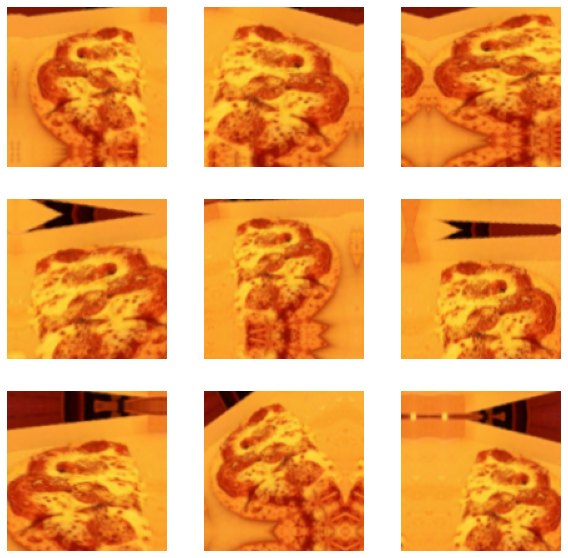

In [36]:
import numpy as np

for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = modelo_aum(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")

In [37]:
modelo_aum.add(Convolution2D(32,
                             (kernel_size, kernel_size),
                             padding='valid',
                             input_shape=(image_size, image_size, 3), 
                             activation='relu'))
modelo_aum.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
modelo_aum.add(Convolution2D (32, (kernel_size, kernel_size), activation='relu'))
modelo_aum.add(MaxPooling2D(pool_size=(pool_size2, pool_size2)))
modelo_aum.add(Flatten())
modelo_aum.add(Dense(128, activation="relu"))
modelo_aum.add(Dropout(0.5))
modelo_aum.add(Dense(6, activation="softmax"))

In [38]:
modelo_aum.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (1, 128, 128, 3)          0         
                                                                 
 random_zoom (RandomZoom)    (1, 128, 128, 3)          0         
                                                                 
 random_rotation (RandomRota  (1, 128, 128, 3)         0         
 tion)                                                           
                                                                 
 random_translation (RandomT  (1, 128, 128, 3)         0         
 ranslation)                                                     
                                                                 
 conv2d_15 (Conv2D)          (1, 124, 124, 32)         2432      
                                                                 
 max_pooling2d_11 (MaxPoolin  (1, 41, 41, 32)         

In [39]:
modelo_aum.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [40]:
Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

modelo_aum.fit(train_dataset, validation_data= val_dataset, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[Es, Mc])

modelo_aum_Es = load_model('best_model.h5')

score_modelo_aum = modelo_aum_Es.evaluate(test_dataset)
print("Test loss", score_modelo_aum[0])
print("Test accuracy", score_modelo_aum[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_modelo_aum[1]:.1%}")]

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.25142, saving model to best_model.h5
48/48 - 14s - loss: 6.4255 - accuracy: 0.2277 - val_loss: 1.7392 - val_accuracy: 0.2514 - 14s/epoch - 282ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.25142 to 0.26281, saving model to best_model.h5
48/48 - 12s - loss: 1.7276 - accuracy: 0.2563 - val_loss: 1.7159 - val_accuracy: 0.2628 - 12s/epoch - 241ms/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.26281
48/48 - 12s - loss: 1.7483 - accuracy: 0.2442 - val_loss: 1.7434 - val_accuracy: 0.2358 - 12s/epoch - 240ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.26281
48/48 - 12s - loss: 1.7372 - accuracy: 0.2442 - val_loss: 1.7381 - val_accuracy: 0.2372 - 12s/epoch - 240ms/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.26281
48/48 - 11s - loss: 1.7334 - accuracy: 0.2414 - val_loss: 1.7379 - val_accuracy: 0.2386 - 11s/epoch - 239ms/step
Epoch 6/50

Epoch 6: val_accuracy did not improve fro

En un primer momento he utlizado la info que aparece en las diapositivas de clase para "Image augmentation" (RandomFlip, RandomZoom, RandomRotation,...) pero al visualizarlo con plot no hacía nada, la imagen no se mostraba rotada. Así que he optado por otras opciones que he visto en internet. Posteriormente , he utilizado otra función y he conseguido visualizarlo, pero ya tenía montado el resto de modelos con ImageDataGenerator.



---



---



### **8.1.- ImageDataGenerator**


Aumento de la imagen via Keras ImageDataGenerator.

Me he guiado de tutoriales y ejemplos tales como los que aparecen en estas web: [python.hotexamples](https://python.hotexamples.com/es/examples/keras.preprocessing.image/ImageDataGenerator/-/python-imagedatagenerator-class-examples.html) , [analyticsvidhya](https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/) y [vijayabhaskar96](https://vijayabhaskar96.medium.com/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1), entre otros.

En uno de los ejemplos aparecía también el GlobalAveragePooling2D, nombrado en la práctica más abajo.

 - La imagen se desplaza a través de los argumentos width_shift_range y height_shift_range . 
 - La imagen se voltea a través de los argumentos horizontal_flip y vertical_flip . 
 - Rotaciones de imagen a través del  argumento rango_rotación 
 - Brillo de la imagen a través del argumento bright_range . 
 -Zoom de imagen a través del argumento zoom_range .

Buenas prácticas:
- El modelo debe organizarse en bloques repetidos de capas, normalmente formados por múltiples capas de convolución (normalmente Conv2d) y una capa de agrupación máxima (normalmente MaxPooling2D).
- El número de filtros en sus capas debe aumentar a medida que el tamaño de los mapas de características espaciales disminuye.
- Lo profundo y estrecho es mejor que lo ancho y superficial.
- Puede ser beneficioso introducir capas de normalización de lotes después de las capas de convolución.

**Modelo:**

-- Comenzamos el modelo con el preprocesador data_augmentation, seguido de una capa Rescaling.

-- La primera capa de nuestro modelo es una capa Conv2D normal.

-- Utilizamos GlobalAveragePooling2D -que es similar a Flatten, justo antes de la capa de salida.

-- Incluimos una capa Dropout antes de la capa de clasificación final.


In [41]:
def create_datasets_aum(traindir, valdir, testdir, image_size, batch_size):

  train_dataset = ImageDataGenerator(
    #rescale=1./255, 
    featurewise_center=True, 
    featurewise_std_normalization=True, 
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, horizontal_flip=True)

  train_dataset = train_dataset.flow_from_directory(
      traindir, 
      target_size=(image_size,image_size),
      batch_size=batch_size,
      class_mode='categorical'
  )
  val_dataset = image_dataset_from_directory(
      valdir, 
      image_size = (image_size, image_size),
      batch_size = batch_size, 
      label_mode = 'categorical'
  )
  test_dataset = image_dataset_from_directory(
      testdir, 
      image_size = (image_size, image_size),
      batch_size = batch_size, 
      label_mode = 'categorical'
  )
  return train_dataset, val_dataset, test_dataset

Construimos una nueva red:

In [42]:
Nombre = "Red_8"
Diseño = "C(32) + Pool(3) + C(32) + Pool(3) + C(32) + Pool(3) + Flatten + Dense(128) + Dropout(0.5) + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0, Aumento, EarlyStopping y Dropout"

image_size = 128
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

kernel_size = 3
pool_size = 3 

convol8 = Sequential()

convol8.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
convol8.add(Convolution2D (32, 
                          (kernel_size, kernel_size),
                          padding='valid',
                          input_shape=(image_size, image_size, 3), 
                          activation='relu'))
convol8.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
convol8.add(Convolution2D (32, (kernel_size, kernel_size), activation="relu"))
convol8.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
convol8.add(Convolution2D (32, (kernel_size, kernel_size), activation="relu"))
convol8.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
convol8.add(Flatten())
convol8.add(Dense(128, activation="relu"))
convol8.add(Dropout(0.5))

convol8.add(Dense(6, activation="softmax"))

convol8.summary()

convol8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

convol8.fit(train_dataset_aum, validation_data= val_dataset_aum, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[Es, Mc])

convol8_Es = load_model('best_model.h5')

score_convol8 = convol8_Es.evaluate(test_dataset2)
print("Test loss", score_convol8[0])
print("Test accuracy", score_convol8[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_convol8[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 42, 42, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 40, 40, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                         

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.29459, saving model to best_model.h5
48/48 - 46s - loss: 1.7224 - accuracy: 0.2419 - val_loss: 1.6256 - val_accuracy: 0.2946 - 46s/epoch - 963ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.29459 to 0.37287, saving model to best_model.h5
48/48 - 45s - loss: 1.6012 - accuracy: 0.3246 - val_loss: 1.5214 - val_accuracy: 0.3729 - 45s/epoch - 929ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.37287 to 0.41319, saving model to best_model.h5
48/48 - 45s - loss: 1.5378 - accuracy: 0.3640 - val_loss: 1.4261 - val_accuracy: 0.4132 - 45s/epoch - 928ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.41319 to 0.42647, saving model to best_model.h5
48/48 - 44s - loss: 1.4927 - accuracy: 0.3859 - val_loss: 1.4072 - val_accuracy: 0.4265 - 44s/epoch - 921ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.42647 to 0.43406, saving model to best_model.h5
48/48 - 45s - loss: 1.4818 - accuracy: 0.3989 - val_loss: 1.4

**Hemos obtenido un buen resultado, un 61% de acierto en el conjunto de test, siendo la diferencia entre el loss de training y test inapreciable.**




---



---



### **8.2.- ImageDataGenerator, BatchNormalization**


BatchNormalization tiene un efecto de regularización.  Como se calcula sobre mini-lotes y no sobre todo el conjunto de datos, la distribución de datos del modelo ve cada vez que tiene algo de ruido. Puede ayudar a superar el sobreajuste y a aprender mejor. 

Veamos cómo se comporta el modelo anterior, si en lugar de utilizar Dropout utilizamos BatchNormalization.

In [43]:
Nombre = "Red_9"
Diseño = "C(32) +  Pool(3) + C(32) + + BN + Pool(2) + C(32) + BN + Pool(2) + Flatten + Dense(128) + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0, Aumento, EarlyStopping y BatchNormalization"

image_size = 128
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

kernel_size = 3
pool_size = 3 

convol9 = Sequential()

convol9.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
convol9.add(Convolution2D (32, 
                          (kernel_size, kernel_size),
                          padding='valid',
                          input_shape=(image_size, image_size, 3), 
                          activation='relu'))
convol9.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

convol9.add(Convolution2D (32, (kernel_size, kernel_size), activation="relu"))
convol9.add(BatchNormalization())
convol9.add(Activation("relu"))
convol9.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

convol9.add(Convolution2D (32, (kernel_size, kernel_size), activation="relu"))
convol9.add(BatchNormalization())
convol9.add(Activation("relu"))
convol9.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

convol9.add(Flatten())

convol9.add(Dense(128, activation="relu"))
convol9.add(Dense(6, activation="softmax"))

convol9.summary()

convol9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

convol9.fit(train_dataset_aum, validation_data= val_dataset_aum, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[Es, Mc])

convol9_Es = load_model('best_model.h5')

score_convol9 = convol9_Es.evaluate(test_dataset2)
print("Test loss", score_convol9[0])
print("Test accuracy", score_convol9[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_convol9[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 42, 42, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 40, 40, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 40, 40, 32)       128       
 ormalization)                                               

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.21584, saving model to best_model.h5
48/48 - 46s - loss: 1.8047 - accuracy: 0.2882 - val_loss: 1.7645 - val_accuracy: 0.2158 - 46s/epoch - 954ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.21584 to 0.25996, saving model to best_model.h5
48/48 - 44s - loss: 1.5396 - accuracy: 0.3678 - val_loss: 1.7530 - val_accuracy: 0.2600 - 44s/epoch - 920ms/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.25996
48/48 - 43s - loss: 1.4586 - accuracy: 0.4081 - val_loss: 1.7586 - val_accuracy: 0.2405 - 43s/epoch - 897ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.25996 to 0.28510, saving model to best_model.h5
48/48 - 43s - loss: 1.4124 - accuracy: 0.4385 - val_loss: 1.7218 - val_accuracy: 0.2851 - 43s/epoch - 893ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.28510 to 0.29791, saving model to best_model.h5
48/48 - 43s - loss: 1.3446 - accuracy: 0.4688 - val_loss: 1.7123 - val_accuracy: 0.2979 - 43s/ep

Resultado del accuracy en test algo inferior con respecto al modelo anterior.





---



---



In [44]:
Nombre = "Red_9_mejorada"
Diseño = "C(32) +  Pool(3) + C(32) + + BN + Pool(2) + C(32) + BN + Pool(2) + Flatten + Dense(128) + Dropout(0.5) + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0, Aumento, EarlyStopping y BatchNormalization"

image_size = 128
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

kernel_size = 3
pool_size = 3 

Red_9_mejorada = Sequential()

Red_9_mejorada.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
Red_9_mejorada.add(Convolution2D (32, 
                          (kernel_size, kernel_size),
                          padding='valid',
                          input_shape=(image_size, image_size, 3), 
                          activation='relu'))
Red_9_mejorada.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

Red_9_mejorada.add(Convolution2D (32, (kernel_size, kernel_size), activation="relu"))
Red_9_mejorada.add(BatchNormalization())
Red_9_mejorada.add(Activation("relu"))
Red_9_mejorada.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

Red_9_mejorada.add(Convolution2D (32, (kernel_size, kernel_size), activation="relu"))
Red_9_mejorada.add(BatchNormalization())
Red_9_mejorada.add(Activation("relu"))
Red_9_mejorada.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

Red_9_mejorada.add(Flatten())

Red_9_mejorada.add(Dense(128, activation="relu"))
Red_9_mejorada.add(Dropout(0.5))
Red_9_mejorada.add(Dense(6, activation="softmax"))

Red_9_mejorada.summary()

Red_9_mejorada.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

Red_9_mejorada.fit(train_dataset_aum, validation_data= val_dataset_aum, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[Es, Mc])

Red_9_mejorada_Es = load_model('best_model.h5')

score_Red_9_mejorada = Red_9_mejorada_Es.evaluate(test_dataset2)
print("Test loss", score_Red_9_mejorada[0])
print("Test accuracy", score_Red_9_mejorada[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_Red_9_mejorada[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 42, 42, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 40, 40, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 40, 40, 32)       128       
 hNormalization)                                             

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.23102, saving model to best_model.h5
48/48 - 45s - loss: 1.9632 - accuracy: 0.2496 - val_loss: 1.7760 - val_accuracy: 0.2310 - 45s/epoch - 933ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.23102 to 0.23197, saving model to best_model.h5
48/48 - 44s - loss: 1.6282 - accuracy: 0.3089 - val_loss: 1.7734 - val_accuracy: 0.2320 - 44s/epoch - 920ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.23197 to 0.26850, saving model to best_model.h5
48/48 - 44s - loss: 1.5799 - accuracy: 0.3329 - val_loss: 1.7537 - val_accuracy: 0.2685 - 44s/epoch - 915ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.26850 to 0.28748, saving model to best_model.h5
48/48 - 44s - loss: 1.5300 - accuracy: 0.3621 - val_loss: 1.7281 - val_accuracy: 0.2875 - 44s/epoch - 919ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.28748 to 0.32732, saving model to best_model.h5
48/48 - 44s - loss: 1.4985 - accuracy: 0.3854 - val_loss: 1.7

Se reduce la accuracy.

In [45]:
Nombre = "Red_9_mejorada2"
Diseño = "C(32) +  Pool(3) + C(32) + + BN + Pool(2) + C(32) + BN + Pool(2) + Flatten + Dense(512) + Dropout(0.5) + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0, Aumento, EarlyStopping y BatchNormalization"

image_size = 128
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

kernel_size = 3
pool_size = 3 

Red_9_mejorada2 = Sequential()

Red_9_mejorada2.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
Red_9_mejorada2.add(Convolution2D (32, 
                          (kernel_size, kernel_size),
                          padding='valid',
                          input_shape=(image_size, image_size, 3), 
                          activation='relu'))
Red_9_mejorada2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

Red_9_mejorada2.add(Convolution2D (32, (kernel_size, kernel_size), activation="relu"))
Red_9_mejorada2.add(BatchNormalization())
Red_9_mejorada2.add(Activation("relu"))
Red_9_mejorada2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

Red_9_mejorada2.add(Convolution2D (32, (kernel_size, kernel_size), activation="relu"))
Red_9_mejorada2.add(BatchNormalization())
Red_9_mejorada2.add(Activation("relu"))
Red_9_mejorada2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

Red_9_mejorada2.add(Flatten())

Red_9_mejorada2.add(Dense(512, activation="relu"))
Red_9_mejorada2.add(Dropout(0.5))
Red_9_mejorada2.add(Dense(6, activation="softmax"))

Red_9_mejorada2.summary()

Red_9_mejorada2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

Red_9_mejorada2.fit(train_dataset_aum, validation_data= val_dataset_aum, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[Es, Mc])

Red_9_mejorada2_Es = load_model('best_model.h5')

score_Red_9_mejorada2 = Red_9_mejorada2_Es.evaluate(test_dataset2)
print("Test loss", score_Red_9_mejorada2[0])
print("Test accuracy", score_Red_9_mejorada2[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_Red_9_mejorada2[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 42, 42, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 40, 40, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 40, 40, 32)       128       
 hNormalization)                                             

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.14564, saving model to best_model.h5
48/48 - 45s - loss: 1.8721 - accuracy: 0.2877 - val_loss: 1.7802 - val_accuracy: 0.1456 - 45s/epoch - 931ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.14564 to 0.25664, saving model to best_model.h5
48/48 - 44s - loss: 1.5270 - accuracy: 0.3765 - val_loss: 1.7744 - val_accuracy: 0.2566 - 44s/epoch - 921ms/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.25664
48/48 - 44s - loss: 1.4712 - accuracy: 0.4009 - val_loss: 1.7695 - val_accuracy: 0.2253 - 44s/epoch - 915ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.25664 to 0.29886, saving model to best_model.h5
48/48 - 44s - loss: 1.4252 - accuracy: 0.4257 - val_loss: 1.7388 - val_accuracy: 0.2989 - 44s/epoch - 917ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.29886 to 0.30598, saving model to best_model.h5
48/48 - 44s - loss: 1.3870 - accuracy: 0.4536 - val_loss: 1.6984 - val_accuracy: 0.3060 - 44s/ep

Ligero sobreajuste.

Veamos qué pasa si añadimos nueva capa dense + dropout.

In [46]:
Nombre = "Red_9_mejorada3"
Diseño = "C(32) +  Pool(3) + C(32) + + BN + Pool(2) + C(32) + BN + Pool(2) + Flatten + Dense(512) + Dropout(0.5) + Dense(512) + Dropout(0.5) + Dense(6)"
Estrategia_entrenamiento = "Entrenamiento desde 0, Aumento, EarlyStopping y BatchNormalization"

image_size = 128
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

kernel_size = 3
pool_size = 3 

Red_9_mejorada3 = Sequential()

Red_9_mejorada3.add(Rescaling(scale=1./255, input_shape=(image_size, image_size, 3)))
Red_9_mejorada3.add(Convolution2D (32, 
                          (kernel_size, kernel_size),
                          padding='valid',
                          input_shape=(image_size, image_size, 3), 
                          activation='relu'))
Red_9_mejorada3.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

Red_9_mejorada3.add(Convolution2D (32, (kernel_size, kernel_size), activation="relu"))
Red_9_mejorada3.add(BatchNormalization())
Red_9_mejorada3.add(Activation("relu"))
Red_9_mejorada3.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

Red_9_mejorada3.add(Convolution2D (32, (kernel_size, kernel_size), activation="relu"))
Red_9_mejorada3.add(BatchNormalization())
Red_9_mejorada3.add(Activation("relu"))
Red_9_mejorada3.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

Red_9_mejorada3.add(Flatten())

Red_9_mejorada3.add(Dense(512, activation="relu"))
Red_9_mejorada3.add(Dropout(0.5))
Red_9_mejorada3.add(Dense(512, activation="relu"))
Red_9_mejorada3.add(Dropout(0.5))

Red_9_mejorada3.add(Dense(6, activation="softmax"))

Red_9_mejorada3.summary()

Red_9_mejorada3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

Red_9_mejorada3.fit(train_dataset_aum, validation_data= val_dataset_aum, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[Es, Mc])

Red_9_mejorada3_Es = load_model('best_model.h5')

score_Red_9_mejorada3 = Red_9_mejorada3_Es.evaluate(test_dataset2)
print("Test loss", score_Red_9_mejorada3[0])
print("Test accuracy", score_Red_9_mejorada3[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_Red_9_mejorada3[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 42, 42, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 40, 40, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 40, 40, 32)       128       
 hNormalization)                                             

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.19450, saving model to best_model.h5
48/48 - 46s - loss: 1.8200 - accuracy: 0.2889 - val_loss: 1.7812 - val_accuracy: 0.1945 - 46s/epoch - 952ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.19450 to 0.22581, saving model to best_model.h5
48/48 - 44s - loss: 1.5660 - accuracy: 0.3486 - val_loss: 1.7800 - val_accuracy: 0.2258 - 44s/epoch - 917ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.22581 to 0.22770, saving model to best_model.h5
48/48 - 44s - loss: 1.5148 - accuracy: 0.3732 - val_loss: 1.7754 - val_accuracy: 0.2277 - 44s/epoch - 920ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.22770 to 0.28368, saving model to best_model.h5
48/48 - 44s - loss: 1.4535 - accuracy: 0.4129 - val_loss: 1.7445 - val_accuracy: 0.2837 - 44s/epoch - 915ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.28368 to 0.31309, saving model to best_model.h5
48/48 - 44s - loss: 1.4149 - accuracy: 0.4347 - val_loss: 1.7

**La "Red mejorada3" consigue alejar el sobreajuste de la "Red mejorada2" y obtiene buenos resultados de accuracy en test, con casi un 60%.**


## Transfer learning

Aunque diseñar nuestra propia red puede producir algunos resultados aceptables, suele ser mejor aprovechar el conocimiento ya existente en una red pre-entrenada. Esto no solo nos lleva a resultados mejores, sino que además nos ahorra mucho tiempo de diseño de la red. Para ello, el módulo [Keras Applications](https://keras.io/api/applications/) contiene varios diseños de redes listos para su uso. Por ejemplo, para hacer uso de la famosa red VGG16 hacemos lo siguiente

In [47]:
from tensorflow.keras.applications import VGG16

vgg16_model = VGG16(include_top=False, input_shape=(image_size, image_size, 3))

Por defecto, todas las redes de Keras Applications están precargadas con los pesos que se obtuvieron al entrenar la red sobre el dataset de la competición de [ImageNet](http://www.image-net.org/). Para adaptar la red a nuestro problema, hemos necesitado especificar la resolución de nuestras imágenes (`input_shape`), así como eliminar las capas de salida (`top`) de la red original, dado que nosotros tendremos un número diferente de clases.

Ahora, ¿cómo hacemos para transferir el aprendizaje de esta red? Vamos a ver cómo implementar la estrategia de "bottleneck features". En primer lugar, marcamos el modelo VGG16 como no entrenable, para que sus parámetros se mantengan congelados.

In [48]:
vgg16_model.trainable = False

Hecho esto, vamos a construir una red neuronal que incluya la VGG16 como una de sus "capas". Es necesario tener en cuenta que la red VGG16 se entrenó realizando una normalización muy específica de las imágenes de entrenamiento, y nosotros debemos seguir ese mismo proceso para que la red se comporte correctamente. Convenientemente, Keras también nos da una funcionalidad para replicar la normalización que la VGG16 necesita.

In [49]:
from tensorflow.keras.applications.vgg16 import preprocess_input

Podemos probar esta normalización con alguna de las imágenes de nuestro dataset

In [50]:
for X_batch, _ in train_dataset:
    break
    
print(f"Before normalizing: {X_batch[0, :3, :3, :]}")
print(f"After normalizing: {preprocess_input(X_batch)[0, :3, :3, :]}")

Before normalizing: [[[29.   26.   14.5 ]
  [16.5  19.5   5.  ]
  [30.5  34.25 17.25]]

 [[22.25 29.   13.  ]
  [16.25 21.    5.75]
  [21.25 23.25  9.  ]]

 [[17.5  25.5   7.  ]
  [13.   15.25  0.5 ]
  [17.5  12.5   3.75]]]
After normalizing: [[[ -89.439  -90.779  -94.68 ]
  [ -98.939  -97.279 -107.18 ]
  [ -86.689  -82.529  -93.18 ]]

 [[ -90.939  -87.779 -101.43 ]
  [ -98.189  -95.779 -107.43 ]
  [ -94.939  -93.529 -102.43 ]]

 [[ -96.939  -91.279 -106.18 ]
  [-103.439 -101.529 -110.68 ]
  [-100.189 -104.279 -106.18 ]]]


La normalización realizada por la VGG16 consiste en invertir el orden de los canales de color (RGB -> BGR), y restar los valores medios sobre todo el dataset ImageNet para cada canal de color por separado. Afortunadamente, la función `preprocess_input` que hemos importado hace todo este trabajo por nosotros. Además, podemos incrustar esta función como la primera capa de nuestra red, cumpliendo el papel de la capa `Rescaling` que utilizamos en el apartado anterior. Esto es posible gracias a la capa `Lambda`, que permite construir una capa Keras en base a cualquier función de Tensorflow. De modo que, vamos a comenzar nuestro diseño de red con esta capa.

In [51]:
from tensorflow.keras.layers import Lambda

model = Sequential()
model.add(Lambda(preprocess_input, input_shape=(image_size, image_size, 3)))

Tras esto, podemos añadir toda la red VGG16 como si fuera una nueva capa, y nuestras propias capas después de ella. A continuación tenemos un ejemplo de esta clase de diseño, aunque es importante destacar que es un diseño muy sencillo que contiene algunos fallos; una red real para hacer transfer learning debería tener un diseño mejor.

In [52]:
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 128, 128, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 8192)              0         
                                                                 
 dense_27 (Dense)            (None, 6)                 49158     
                                                                 
Total params: 14,763,846
Trainable params: 49,158
Non-trainable params: 14,714,688
_________________________________________________________________


Observa cómo en el resumen del modelo podemos ver que la red completa tiene millones de parámetros, pero dado que hemos congelado toda la parte de la red perteneciente a la VGG16, solo unos pocos miles de parámetros son entrenables (trainable): aquellos correspondientes a la capa Dense que hemos colocado al final.

Ya podemos compilar y entrenar el modelo a la manera habitual.

In [53]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])
model.fit(train_dataset, epochs=1)

loss, acc = model.evaluate(test_dataset)
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

17/17 [==============================] - 5s 182ms/step - loss: 177.3993 - accuracy: 0.5469
Loss 1.77e+02, accuracy 54.7%


<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Usando la estrategia "bottleneck" presentada, implementa una red que haga transfer learning desde la red VGG16, con un diseño correcto. Si lo haces adecuadamente, esta red debe obtener mejores resultados que con la red que diseñaste en el apartado anterior, y con al menos un 80% de acierto sobre el conjunto de test.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
Algunos consejos para mejorar tu diseño de red:
    
- Incluye una o más capas Dense, con sus funciones de activación apropiadas, antes de la capa de salida.
- Intenta usar una capa de tipo [GlobalAveragePooling](https://keras.io/api/layers/pooling_layers/global_average_pooling2d/) en lugar de la capa Flatten. Esta capa calcula una media de todos los valores de píxeles para cada canal, y en algunas ocasiones produce mejores resultados que la capa Flatten.
- ¡Y no olvides todos los consejos del apartado anterior! También aplican aquí.
</font>

***

### **VGG16 _10**


Revisando documentación sobre diseños de redes, en [becominghuman](https://becominghuman.ai/using-keras-imagedatagenerator-with-transfer-learning-c4787d430060) mencionan que combinados, ImageDataGenerators y Transfer Learning reducen drásticamente:
- La cantidad de datos necesarios para entrenar el modelo.
- La cantidad de tiempo requerida para configurar nuestros propios datos.

Por lo que aplico ambos.

En la [documentación](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit_generator) para tf.keras.Sequential.fit_generator se describen "steps_per_epoch" como :

Número total de pasos (lotes de muestras) a producir del generador antes de declarar una época terminada y comenzar la próxima época. Por lo general, debe ser igual a la cantidad de muestras de su conjunto de datos dividida por el tamaño del lote.

En nuestro caso : "Found 6082 images belonging to 6 classes."

Inculimos más capas dense antes de la de salida.

In [54]:
Nombre = "VGG16_10"
Diseño = "VGG16 + Flatten + Dense(128) + Dense(128) + Dense(128) + Dense(6)"
Estrategia_entrenamiento = "Bottleneck, Aumento, y EarlyStopping"

image_size = 128
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

channels = 3
kernel_size = 3 
 

VGG16_10 = Sequential()
VGG16_10.add(Lambda(preprocess_input, input_shape=(image_size, image_size, 3)))

VGG16_10.add(vgg16_model)
VGG16_10.add(Flatten())
VGG16_10.add(Dense(128, activation="relu"))
VGG16_10.add(Dense(128, activation="relu"))
VGG16_10.add(Dense(128, activation="relu"))
VGG16_10.add(Dense(6, activation= 'softmax'))

VGG16_10.summary()

VGG16_10.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

VGG16_10.fit(train_dataset_aum, validation_data=(val_dataset_aum), batch_size=batch_size, steps_per_epoch=6082/batch_size, epochs=epochs, verbose=2, callbacks=[Es, Mc])

VGG16_10_Es = load_model('best_model.h5')

score_VGG16_10 = VGG16_10_Es.evaluate(test_dataset2)
print("Test loss", score_VGG16_10[0])
print("Test accuracy", score_VGG16_10[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_VGG16_10[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 128, 128, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_15 (Flatten)        (None, 8192)              0         
                                                                 
 dense_28 (Dense)            (None, 128)               1048704   
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 128)               16512 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.59535, saving model to best_model.h5
47/47 - 48s - loss: 3.6307 - accuracy: 0.4467 - val_loss: 1.2825 - val_accuracy: 0.5954 - 48s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.59535 to 0.65797, saving model to best_model.h5
47/47 - 47s - loss: 1.0585 - accuracy: 0.6378 - val_loss: 0.9768 - val_accuracy: 0.6580 - 47s/epoch - 982ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.65797 to 0.70920, saving model to best_model.h5
47/47 - 46s - loss: 0.8336 - accuracy: 0.6988 - val_loss: 0.8657 - val_accuracy: 0.7092 - 46s/epoch - 978ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.70920
47/47 - 46s - loss: 0.7724 - accuracy: 0.7213 - val_loss: 0.9051 - val_accuracy: 0.7016 - 46s/epoch - 976ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.70920 to 0.72343, saving model to best_model.h5
47/47 - 47s - loss: 0.7165 - accuracy: 0.7430 - val_loss: 0.8581 - val_accuracy: 0.7234 - 47s/epoch

Buen resultado en accuracy test (77%), aunque vemos cómo val_loss es bastante superior al traint_loss.  Vamos a intentar reducir sobreajuste incorporando Dropout.



---



---



### **VGG16 _11**


In [55]:
Nombre = "VGG16_11"
Diseño = "VGG16  + Flatten + Dense(128) + DropOut(0.5) + Dense(128) + DropOut(0.5) + Dense(128) + DropOut(0.5) + Dense(6)"
Estrategia_entrenamiento = "Bottleneck, Aumento, DropOut y EarlyStopping"

image_size = 128
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

channels = 3
kernel_size = 3 


VGG16_11 = Sequential()
VGG16_11.add(Lambda(preprocess_input, input_shape=(image_size, image_size, 3)))

VGG16_11.add(vgg16_model)
VGG16_11.add(Flatten())
VGG16_11.add(Dense(128, activation="relu"))
VGG16_11.add(Dropout(0.5))
VGG16_11.add(Dense(128, activation="relu"))
VGG16_11.add(Dropout(0.5))
VGG16_11.add(Dense(128, activation="relu"))
VGG16_11.add(Dropout(0.5))
VGG16_11.add(Dense(6, activation= 'softmax'))

VGG16_11.summary()

VGG16_11.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

VGG16_11.fit(train_dataset_aum, validation_data=(val_dataset_aum), batch_size=batch_size, steps_per_epoch=6082/batch_size, epochs = epochs, verbose=2, callbacks=[Es, Mc])

VGG16_11_Es = load_model('best_model.h5')

score_VGG16_11 = VGG16_11_Es.evaluate(test_dataset2)
print("Test loss", score_VGG16_11[0])
print("Test accuracy", score_VGG16_11[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_VGG16_11[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 128, 128, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_16 (Flatten)        (None, 8192)              0         
                                                                 
 dense_32 (Dense)            (None, 128)               1048704   
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               16512 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.23767, saving model to best_model.h5
47/47 - 47s - loss: 4.4491 - accuracy: 0.2088 - val_loss: 1.7707 - val_accuracy: 0.2377 - 47s/epoch - 994ms/step
Epoch 2/50

Epoch 2: val_accuracy did not improve from 0.23767
47/47 - 46s - loss: 1.7678 - accuracy: 0.2376 - val_loss: 1.7559 - val_accuracy: 0.2362 - 46s/epoch - 976ms/step
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.23767
47/47 - 46s - loss: 1.7485 - accuracy: 0.2455 - val_loss: 1.7417 - val_accuracy: 0.2358 - 46s/epoch - 973ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.23767
47/47 - 46s - loss: 1.7438 - accuracy: 0.2435 - val_loss: 1.7350 - val_accuracy: 0.2367 - 46s/epoch - 977ms/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.23767
47/47 - 47s - loss: 1.7366 - accuracy: 0.2460 - val_loss: 1.7356 - val_accuracy: 0.2372 - 47s/epoch - 992ms/step
Epoch 6/50

Epoch 6: val_accuracy did not improve from 0.23767
47/47 - 46s - loss: 1.734

Corregimos el sobreajuste, pero obtenemos un mal resultado (bajo accuracy), incorporando el Dropout!



---



---



### **VGG16 _12**


Sustituimos la capa Flatten y vemos cómo se comporta el modelo anterior aplicando el GlobalAveragePooling2D.

GAP2D es una operación que calcula el resultado promedio de cada mapa de características en la capa anterior. Esta operación bastante simple reduce significativamente los datos y prepara el modelo para la capa de clasificación final. Su ventaja principal es que con la  eliminación de ese gran número de parámetros entrenables, también reduce la tendencia al sobreajuste.


In [56]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [57]:
Nombre = "VGG16_12"
Diseño = "VGG16  + C(128) + Pool(3) + GAP2D + Dense(128) + DropOut(0.5) + Dense(128) + DropOut(0.5) + Dense(128) + DropOut(0.5) + Dense(6)"
Estrategia_entrenamiento = "Transfer Learning, Aumento, DropOut, EarlyStopping y GlobalAveragePooling2D"

image_size = 128
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

channels = 3
pool_size = 3 
kernel_size = 3 


VGG16_12 = Sequential()

VGG16_12.add(Lambda(preprocess_input, input_shape=(image_size, image_size, 3)))

VGG16_12.add(vgg16_model)

VGG16_12.add(Convolution2D(128,
                           (kernel_size, kernel_size),
                           padding='same',
                           activation='relu'))
VGG16_12.add(MaxPooling2D(pool_size=pool_size, strides=4))

VGG16_12.add(GlobalAveragePooling2D(data_format=None, keepdims=False))

VGG16_12.add(Dense(128, activation='relu'))
VGG16_12.add(Dropout(0.5))

VGG16_12.add(Dense(128, activation='relu'))
VGG16_12.add(Dropout(0.5))

VGG16_12.add(Dense(128, activation='relu'))
VGG16_12.add(Dropout(0.5))

VGG16_12.add(Dense(6, activation="softmax"))


VGG16_12.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

VGG16_12.fit(train_dataset_aum, validation_data=val_dataset_aum, epochs=epochs, callbacks=[Es, Mc]) #Si ponía como antes steps_per_epoch=6082/batch_size me daba problemas

VGG16_12_Es = load_model('best_model.h5')

score_VGG16_12 = VGG16_12_Es.evaluate(test_dataset2)
print("Test loss", score_VGG16_12[0])
print("Test accuracy", score_VGG16_12[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_VGG16_12[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
48/48 [==============================] - ETA: 0s - loss: 5.6443 - accuracy: 0.2032
Epoch 1: val_accuracy improved from -inf to 0.29696, saving model to best_model.h5
48/48 [==============================] - 49s 1s/step - loss: 5.6443 - accuracy: 0.2032 - val_loss: 1.6736 - val_accuracy: 0.2970
Epoch 2/50
48/48 [==============================] - ETA: 0s - loss: 1.8454 - accuracy: 0.2277
Epoch 2: val_accuracy improved from 0.29696 to 0.29744, saving model to best_model.h5
48/48 [==============================] - 47s 983ms/step - loss: 1.8454 - accuracy: 0.2277 - val_loss: 1.7139 - val_accuracy: 0.2974
Epoch 3/50
48/48 [==============================] - ETA: 0s - loss: 1.7440 - accuracy: 0.2435
Epoch 3: val_accuracy improved from 0.29744 to 0.36765, saving model to best_model.h5
48/48 [==============================] - 47s 976ms/step - loss: 1.7440 - accuracy: 0.2435 - val_loss: 1.6472 - val_accuracy: 0.3676
Epoch 4/50
48/48 [==============================] - ETA: 0s - loss: 1.



---



---



### **VGG16_13**




Y si aumentamos el tamaño de imagen a 256 y el número de neuronas por capa dense??

In [58]:
Nombre = "VGG16_13"
Diseño = "VGG16  + C(128) + Pool(3) + C(128) + Pool(3) + GAP2D + Dense(512) + DropOut(0.5) + Dense(512) + DropOut(0.5) + Dense(512) + DropOut(0.5) + Dense(6)"
Estrategia_entrenamiento = "Transfer Learning, Aumento, DropOut, EarlyStopping y GlobalAveragePooling2D"

image_size = 256
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

vgg16_model = VGG16(include_top=False, input_shape=(image_size, image_size, 3))

vgg16_model.trainable = False
from keras.applications.vgg16 import preprocess_input

channels = 3
pool_size = 3 
kernel_size = 3 


VGG16_13 = Sequential()

VGG16_13.add(Lambda(preprocess_input, input_shape=(image_size, image_size, 3)))

VGG16_13.add(vgg16_model)

VGG16_13.add(Convolution2D(128,
                           (kernel_size, kernel_size),
                           padding='same',
                           activation='relu'))
VGG16_13.add(MaxPooling2D(pool_size=pool_size, strides=4))
VGG16_13.add(GlobalAveragePooling2D(data_format=None, keepdims=False))

VGG16_13.add(Dense(512, activation='relu'))
VGG16_13.add(Dropout(0.5))

VGG16_13.add(Dense(512, activation='relu'))
VGG16_13.add(Dropout(0.5))

VGG16_13.add(Dense(512, activation='relu'))
VGG16_13.add(Dropout(0.5))

VGG16_13.add(Dense(6, activation="softmax"))


VGG16_13.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

VGG16_13.fit(train_dataset_aum, validation_data=val_dataset_aum, epochs=epochs, callbacks=[Es, Mc]) #Si ponía como antes steps_per_epoch=6082/batch_size me daba problemas

VGG16_13_Es = load_model('best_model.h5')

score_VGG16_13 = VGG16_13_Es.evaluate(test_dataset2)
print("Test loss", score_VGG16_13[0])
print("Test accuracy", score_VGG16_13[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_VGG16_13[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
48/48 [==============================] - ETA: 0s - loss: 2.5503 - accuracy: 0.2925
Epoch 1: val_accuracy improved from -inf to 0.54269, saving model to best_model.h5
48/48 [==============================] - 119s 2s/step - loss: 2.5503 - accuracy: 0.2925 - val_loss: 1.2405 - val_accuracy: 0.5427
Epoch 2/50
48/48 [==============================] - ETA: 0s - loss: 1.1200 - accuracy: 0.5965
Epoch 2: val_accuracy improved from 0.54269 to 0.73008, saving model to best_model.h5
48/48 [==============================] - 123s 3s/step - loss: 1.1200 - accuracy: 0.5965 - val_loss: 0.8008 - val_accuracy: 0.7301
Epoch 3/50
48/48 [==============================] - ETA: 0s - loss: 0.8411 - accuracy: 0.7159
Epoch 3: val_accuracy improved from 0.73008 to 0.79412, saving model to best_model.h5
48/48 [==============================] - 116s 2s/step - loss: 0.8411 - accuracy: 0.7159 - val_loss: 0.6477 - val_accuracy: 0.7941
Epoch 4/50
48/48 [==============================] - ETA: 0s - loss: 0.690



---



---



<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>

Para mejorar aún más los resultados de tu red, utiliza las siguientes ideas:

- Usa las estrategias PRO del ejercicio anterio.
- Prueba otras redes pre-entrenadas de <a href="https://keras.io/api/applications/">Keras Applications</a>, como ResNet, Xception o EfficientNet.
- Usa una estrategia de transfer learning más avanzada, como fine-tuning o una combinación de bottleneck features y fine-tuning. Revisa las diapositivas de clase para saber cómo.
   
Si empleas todos estos trucos, es posible alcanzar más de un 90% de acierto en el conjunto de test.

</font>

***

### **OTRAS REDES**

#### - Xception



In [59]:
from tensorflow.keras.applications.xception import Xception

xception_model = Xception(include_top=False, input_shape=(image_size, image_size, 3))

In [60]:
xception_model.trainable = False

Compilamos y entrenamos Xception:

Utilizamos Dropout 0,2 . Según información obtenida de internet, Xception funciona bien con este dropout.

In [62]:
Nombre = "Xception_14"
Diseño = "Xception + GAP2D + Dense(512) + DropOut(0.2) + Dense(6)"
Estrategia_entrenamiento = "Transfer Learning, Aumento, DropOut, EarlyStopping y GlobalAveragePooling2D"

from tensorflow import keras
from tensorflow.keras.applications import Xception


xception_model = Xception(include_top=False, input_shape=(image_size, image_size, 3))
xception_model.trainable = False

from tensorflow.keras.applications.xception import preprocess_input as xc_preprocess_input  
from tensorflow.keras.layers import Lambda

image_size = 256
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

channels = 3
kernel_size = 9 
pool_size = 3 


Xception_14 = Sequential()

Xception_14.add(Lambda(xc_preprocess_input, input_shape=(image_size, image_size, 3)))

Xception_14.add(xception_model)

Xception_14.add(GlobalAveragePooling2D(data_format=None, keepdims=False))

Xception_14.add(Dense(512, activation="relu"))
Xception_14.add(Dropout(0.2))


Xception_14.add(Dense(6, activation="softmax"))

Xception_14.summary()


Xception_14.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

Xception_14.fit(train_dataset_aum, validation_data=val_dataset_aum, epochs=epochs, callbacks=[Es, Mc]) #Si ponía como antes steps_per_epoch=6082/batch_size me daba problemas

Xception_14_Es = load_model('best_model.h5')

score_Xception_14 = Xception_14_Es.evaluate(test_dataset2)
print("Test loss", score_Xception_14[0])
print("Test accuracy", score_Xception_14[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_Xception_14[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_6 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_48 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                             

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
48/48 [==============================] - ETA: 0s - loss: 0.7481 - accuracy: 0.7361
Epoch 1: val_accuracy improved from -inf to 0.81594, saving model to best_model.h5
48/48 [==============================] - 118s 2s/step - loss: 0.7481 - accuracy: 0.7361 - val_loss: 0.5316 - val_accuracy: 0.8159
Epoch 2/50
48/48 [==============================] - ETA: 0s - loss: 0.5263 - accuracy: 0.8073
Epoch 2: val_accuracy improved from 0.81594 to 0.83634, saving model to best_model.h5
48/48 [==============================] - 114s 2s/step - loss: 0.5263 - accuracy: 0.8073 - val_loss: 0.4634 - val_accuracy: 0.8363
Epoch 3/50
48/48 [==============================] - ETA: 0s - loss: 0.4606 - accuracy: 0.8380
Epoch 3: val_accuracy did not improve from 0.83634
48/48 [==============================] - 116s 2s/step - loss: 0.4606 - accuracy: 0.8380 - val_loss: 0.4678 - val_accuracy: 0.8344
Epoch 4/50
48/48 [==============================] - ETA: 0s - loss: 0.4374 - accuracy: 0.8435
Epoch 4: val_a

Probamos si superamos el accuracy con otra combinación.



---



---



In [64]:
Nombre = "Xception_15"
Diseño = "Xception + GAP2D + Dense(1024) + DropOut(0.2) + Dense(6)"
Estrategia_entrenamiento = "Bottleneck, Aumento, DropOut, EarlyStopping y GlobalAveragePooling2D"

from tensorflow import keras
from tensorflow.keras.applications import Xception


xception_model = Xception(include_top=False, input_shape=(image_size, image_size, 3))
xception_model.trainable = False

from tensorflow.keras.applications.xception import preprocess_input as xcep_preprocess_input  
from tensorflow.keras.layers import Lambda


image_size = 256
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

channels = 3
kernel_size = 9 
pool_size = 3 


Xception_15 = Sequential()

Xception_15.add(Lambda(xcep_preprocess_input, input_shape=(image_size, image_size, 3)))

Xception_15.add(xception_model)

Xception_15.add(GlobalAveragePooling2D())

Xception_15.add(Dense(1024, activation="relu"))
Xception_15.add(Dropout(0.2))

Xception_15.add(Dense(6, activation="softmax"))

Xception_15.summary()


Xception_15.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

Xception_15.fit(train_dataset_aum, validation_data=val_dataset_aum, epochs=epochs, callbacks=[Es, Mc]) #Si ponía como antes steps_per_epoch=6082/batch_size me daba problemas

Xception_15_Es = load_model('best_model.h5')

score_Xception_15 = Xception_15_Es.evaluate(test_dataset2)
print("Test loss", score_Xception_15[0])
print("Test accuracy", score_Xception_15[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_Xception_15[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_8 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_52 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_24 (Dropout)        (None, 1024)              0         
                                                             

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
48/48 [==============================] - ETA: 0s - loss: 0.8326 - accuracy: 0.7009
Epoch 1: val_accuracy improved from -inf to 0.79412, saving model to best_model.h5
48/48 [==============================] - 120s 2s/step - loss: 0.8326 - accuracy: 0.7009 - val_loss: 0.5662 - val_accuracy: 0.7941
Epoch 2/50
48/48 [==============================] - ETA: 0s - loss: 0.5327 - accuracy: 0.8093
Epoch 2: val_accuracy improved from 0.79412 to 0.82827, saving model to best_model.h5
48/48 [==============================] - 117s 2s/step - loss: 0.5327 - accuracy: 0.8093 - val_loss: 0.4862 - val_accuracy: 0.8283
Epoch 3/50
48/48 [==============================] - ETA: 0s - loss: 0.4686 - accuracy: 0.8364
Epoch 3: val_accuracy improved from 0.82827 to 0.83729, saving model to best_model.h5
48/48 [==============================] - 139s 3s/step - loss: 0.4686 - accuracy: 0.8364 - val_loss: 0.4539 - val_accuracy: 0.8373
Epoch 4/50
48/48 [==============================] - ETA: 0s - loss: 0.424



---



---



#### - Estrategia Fine-tuning y Xception 

Con fine-tuning, se utilizan los weights de un modelo preentrenado en otro modelo.
Hay que tener en cuenta sólo la lista
 `model.trainable_weights` al aplicar las actualizaciones del gradiente.

In [69]:
Nombre = "Xception"
Diseño = "Xception + GAP2D + Dense(512) + DropOut(0.2) + Dense(6)"
Estrategia_entrenamiento = "Transfer Learning, Aumento, DropOut, EarlyStopping y GlobalAveragePooling2D"

from tensorflow import keras
from tensorflow.keras.applications import Xception


xception_model = Xception(include_top=False, weights='imagenet', input_shape=(image_size, image_size, 3))
xception_model.trainable = False

from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input  
from tensorflow.keras.layers import Lambda

image_size = 256
batch_size = 128
train_dataset_aum, val_dataset_aum, test_dataset2 = create_datasets_aum(TRAINDIR, VALDIR, TESTDIR, image_size, batch_size)

channels = 3
kernel_size = 9 
pool_size = 3 


Xception = Sequential()

Xception.add(Lambda(xcp_preprocess_input, input_shape=(image_size, image_size, 3)))

Xception.add(xception_model)

Xception.add(GlobalAveragePooling2D(data_format=None, keepdims=False))

Xception.add(Dense(512, activation="relu"))
Xception.add(Dropout(0.2))


Xception.add(Dense(6, activation="softmax"))

Xception.summary()


Xception.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=["accuracy"])

Es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
Mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
epochs = 50

Xception.fit(train_dataset_aum, validation_data=val_dataset_aum, epochs=epochs, callbacks=[Es, Mc]) #Si ponía como antes steps_per_epoch=6082/batch_size me daba problemas

Xception_Es = load_model('best_model.h5')

score_Xception = Xception_Es.evaluate(test_dataset2)
print("Test loss", score_Xception[0])
print("Test accuracy", score_Xception[1])

tabla_resultados.loc[len(tabla_resultados)+1] = [Nombre, (f"{image_size}x{image_size}"), batch_size, Diseño, Estrategia_entrenamiento, (f"{score_Xception[1]:.1%}")]

Found 6082 images belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_9 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_54 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_25 (Dropout)        (None, 512)               0         
                                                             

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
48/48 [==============================] - ETA: 0s - loss: 0.8037 - accuracy: 0.7114
Epoch 1: val_accuracy improved from -inf to 0.79886, saving model to best_model.h5
48/48 [==============================] - 124s 3s/step - loss: 0.8037 - accuracy: 0.7114 - val_loss: 0.5640 - val_accuracy: 0.7989
Epoch 2/50
48/48 [==============================] - ETA: 0s - loss: 0.5423 - accuracy: 0.8048
Epoch 2: val_accuracy improved from 0.79886 to 0.81926, saving model to best_model.h5
48/48 [==============================] - 118s 2s/step - loss: 0.5423 - accuracy: 0.8048 - val_loss: 0.5136 - val_accuracy: 0.8193
Epoch 3/50
48/48 [==============================] - ETA: 0s - loss: 0.4712 - accuracy: 0.8300
Epoch 3: val_accuracy improved from 0.81926 to 0.84393, saving model to best_model.h5
48/48 [==============================] - 118s 2s/step - loss: 0.4712 - accuracy: 0.8300 - val_loss: 0.4411 - val_accuracy: 0.8439
Epoch 4/50
48/48 [==============================] - ETA: 0s - loss: 0.430



---



---



## Informe final y resumen de resultados

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Escribe en la siguiente celda un pequeño informe con:
    <ul>
        <li>Una tabla de resultados, indicando qué diseños de red has probado y qué resultados en test has obtenido. Puede usar un estilo de tabla como el que se muestra abajo.</li>
        <li>De las estrategias y diseños que has ido probando, ¿qué ha funcionado y qué no?</li>
        <li>¿Qué has aprendido con esta práctica?
    </ul>
</font>

***

Ejemplo para la tabla de resultados

|Procesado de imágenes|Diseño de red neuronal|Estrategia de entrenamiento|Acierto en test|
|---------------------|----------------------|---------------------------|---------------|
|Tamaño 32x32, batch size 16|Convolutional(32) + Flatten + Dense(64)|Entrenamiento desde 0|xx%|
|Tamaño 64x64, batch size 32|VGG16 + Flatten + Dense(32)|Bottleneck features|yy%|
|...|...|...|...|



---



---



In [74]:
tabla_resultados

Nombre de Red Procesado de imágenes batch_size  \
1               Red Sencilla                 32x32         64   
2   Red Sencilla (10 epochs)                 32x32         64   
3                      Red_1                 32x32         64   
4                      Red_2                 32x32         64   
5                      Red_3                 32x32         64   
6                      Red_4               128x128        128   
7                      Red_5               256x256        128   
8                LeNet_Red_6                 64x64        128   
9                 modelo_aum               128x128        128   
10                     Red_8               128x128        128   
11                     Red_9               128x128        128   
12            Red_9_mejorada               128x128        128   
13           Red_9_mejorada2               128x128        128   
14           Red_9_mejorada3               128x128        128   
15                  VGG16_10               128x128        128   
16                  VGG16_11               128x128        128   
17                  VGG16_12               128x128        128   
18                  VGG16_13               256x256        128   
19               Xception_14               256x256        128   
20               Xception_15               256x256        128   
21                  Xception               256x256        128   

                               Diseño de red neuronal  \
1                           C(4) + Flatten + Dense(6)   
2                           C(4) + Flatten + Dense(6)   
3                C(32) + Pool(2) + Flatten + Dense(6)   
4   C(32) + C(32) + Pool(2) + Flatten + Dense(128)...   
5   C(32) + C(32) + Pool(2) + Flatten + Dense(128)...   
6   C(50) + Pool(3) + C(50) + Pool(2) + C(50) + Po...   
7   C(128) + Pool(3) + C(128) + Pool(3) + C(128) +...   
8   C(32) + Pool(2) + C(50) + Pool(2) + Flatten + ...   
9   C(32) + Pool(3) + C(32) + Pool(2) + Flatten + ...   
10  C(32) + Pool(3) + C(32) + Pool(3) + C(32) + Po...   
11  C(32) +  Pool(3) + C(32) + + BN + Pool(2) + C(...   
12  C(32) +  Pool(3) + C(32) + + BN + Pool(2) + C(...   
13  C(32) +  Pool(3) + C(32) + + BN + Pool(2) + C(...   
14  C(32) +  Pool(3) + C(32) + + BN + Pool(2) + C(...   
15  VGG16 + Flatten + Dense(128) + Dense(128) + De...   
16  VGG16  + Flatten + Dense(128) + DropOut(0.5) +...   
17  VGG16  + C(128) + Pool(3) + GAP2D + Dense(128)...   
18  VGG16  + C(128) + Pool(3) + C(128) + Pool(3) +...   
19  Xception + GAP2D + Dense(512) + DropOut(0.2) +...   
20  Xception + GAP2D + Dense(1024) + DropOut(0.2) ...   
21  Xception + GAP2D + Dense(512) + DropOut(0.2) +...   

                          Estrategia de entrenamiento Acierto en test  
1                               Entrenamiento desde 0           40.6%  
2                               Entrenamiento desde 0           37.7%  
3                               Entrenamiento desde 0           40.6%  
4                     Entrenamiento desde 0 y Dropout           47.6%  
5      Entrenamiento desde 0, Dropout y EarlyStopping           47.3%  
6               Entrenamiento desde 0 y EarlyStopping           52.4%  
7      Entrenamiento desde 0, DropOut y EarlyStopping           58.6%  
8      Entrenamiento desde 0, DropOut y EarlyStopping           49.0%  
9      Entrenamiento desde 0, DropOut y EarlyStopping           25.0%  
10  Entrenamiento desde 0, Aumento, EarlyStopping ...           61.6%  
11  Entrenamiento desde 0, Aumento, EarlyStopping ...           57.0%  
12  Entrenamiento desde 0, Aumento, EarlyStopping ...           50.9%  
13  Entrenamiento desde 0, Aumento, EarlyStopping ...           57.8%  
14  Entrenamiento desde 0, Aumento, EarlyStopping ...           59.0%  
15               Bottleneck, Aumento, y EarlyStopping           76.9%  
16       Bottleneck, Aumento, DropOut y EarlyStopping           39.1%  
17  Bottleneck, Aumento, DropOut, EarlyStopping y ...           76.0%  
18  Bottleneck, Aumento, DropOut,

### **Informe:**

 - Hemos añadido capas ocultas controlando el descenso de gradientes mediante la función de activación ReLU.

 - Al añadir capas ocultas se incrementa el overfitting y hay que aplicar más dropOut para controlarlo.

 - Si al hacer el summary veía que la información que llegaba a la capa Flatten eran imágenes de tamaño inferior a 10x10, he considerado que teníamos buena proporción en nuestro modelo, tal y como vimos en la teoría. Los resultados obtenidos eran mejores.

 - Un tamaño de imagen 256 funciona bien, en términos generales.

 - Hemos aplicado EarlyStopping para evitar el tener que decidir cuántas "epochs" eran las adecuadas para cada modelo. De esta manera el entrenamiento se detiene cuando la medida de rendimiento elegida (el error en nuestro caso) deja de mejorar (de disminuir). 
Hemos añadido un retraso al activador en términos del número de épocas en las que nos gustaría no ver ninguna mejora, mediante el argumento "patience".

 - Al aplicar las técnicas de aumento de imagen se mejora la accuracy, pero si añadimos BatchNormalization los resultados son peores. Se soluciona retocando el DropOut de la dense.

 - BatchNormalization ha funcionado mejor añadiendo a mayores Dropout. [Ver Red_9 y Red_9_mejoradas]

 - Los mejores resultados se han obtenido con "Transfer Learning".

 - Buenos resultados aplicando una capa GlobalAveragePooling en lugar de la capa Flatten.

 - He ido combinando  tanto el número de neuronas de la capa densa, así como el número de capas densas y capas de convolución.

 - He dejado algunos ejemplos de cómo había ido modificando distintas capas y parámetros para dejar constancia de cómo influían en el resultado, aún a sabiendas que no eran muy buenos modelos [Por ejemplo las variantes en la Red_9]

 - Mejores modelos:
- Sin Transfer Learning -- Red_8: "Entrenamiento desde 0, Aumento, EarlyStopping y Dropout"(image_size = 128)
- Con Transfer Learning -- VGG13_13: "Transfer Learning, Aumento, DropOut, EarlyStopping y GlobalAveragePooling2D"(image_size = 256) y Xception.

 - ¿Qué has aprendido con esta práctica?
- Aunque hemos fijado las semillas aleatorias de numpy y tensorflow, cada vez que se ejecuta un modelo se obtienen resultados diferentes debido a la inicialización aleatoria de los pesos de las neuronas.
- Que es muy útil utilizar el EarlyStopping tanto para no tener que especificar de antemano las epochs como para optimizar el tiempo.
- No siempre la misma estrategia lleva a los mismos resultados.
- Pueden existir distintas combinaciones de hiperparámetros, diseño y estrategias de redes que hagan obtener resultados similares.
- Me estuvo dando 'problemas' el Xception, en el sentido que me daba unos valores bajos de accuracy y no entendía el por qué, hasta que modifiqué el 'alias' de su 'preprocess_input' (from tensorflow.keras.applications.xception import preprocess_input as xc_preprocess_input) y así me salieron valores más razonables. Debía de tener en cuenta el anterior 'preprocess_input' del VGG16_13 y no se sobreescribía. Lo tendré en cuenta para futuros.